# Finding Zestimate erros
 by Jared Godar and Daniel Northcutt

# Goals:
  - Work through datascience pipline for zillow data, documenting the process
  - Use clustering and regression modeling to beat the baseline model
  - Find the drivers for logerror in the Zestimate model


### Through data exploration we came to focus on 5 questions:
- What are the drivers of logerror
- Does logerror vary within geographical cluster
- Does logerror vary within price cluster
- Does logerror vary within size cluster
- Does logerror vary within tax cluster


<hr style="border:1px solid black"> </hr>


In [1]:
##IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Modeling Tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.formula.api import ols

from datetime import date
from scipy import stats


#Custom functions
from env import host, user, password #Database credentials
import wrangle3
import env
import eval_model
import explore2
import model
## Evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

<hr style="border:1px solid black"> </hr>


# Data Wrangle & Exploration

In [2]:
### Note to add details on wrangle ### 

In [3]:

train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()


In [4]:
# train dataset encoded with clustering, dummies, bins, scaled features
train.shape

(36384, 70)

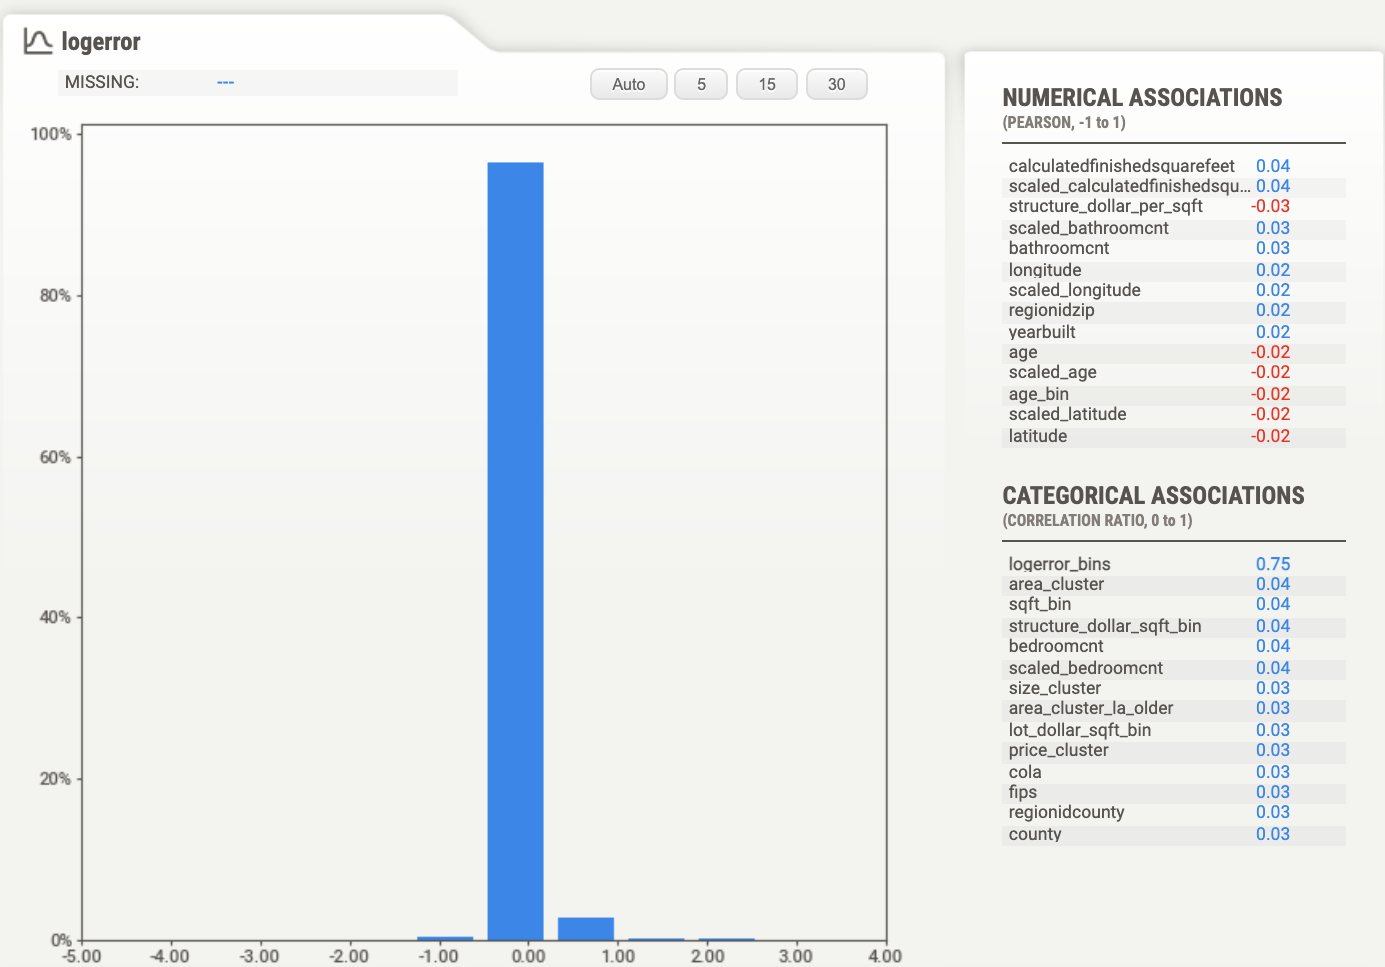

In [5]:
# sweet_viz import to run correlation on dataset to logerror 
# this shows that multiple features offer weak correlations 
# thus telling us that many features will be needed for a strong model

from IPython.display import Image
Image("logerror.png")

In [7]:
# Pearson R to test calculatedfinishedsquarefeet to logerror

explore2.calculatedfinishedsquarefeet_pearsonr()

 The correlation between the calculatedfinishedsquarefeet and the logerror: 0.0355
 The P value between the calculatedfinishedsquarefeet and the logerror:  1.336e-11
 
Reject null hypothesis:
 'There is no correlation between the calculatedfinishedsquarefeet and the logerror'


We now move forward with our alternative hypothesis: 
 'There is a correlation between the calculatedfinishedsquarefeet and logerror'


This is positive correlation with a low p-value.


In [8]:
# Pearson R to test structure_dollar_sqft_bin to logerror

explore2.structure_dollar_sqft_bin_pearsonr()

 The correlation between the structure_dollar_sqft_bin and the logerror: -0.0350
 The P value between the structure_dollar_sqft_bin and the logerror:  2.363e-11
 
Reject null hypothesis:
 'There is no correlation between the structure_dollar_sqft_bin and the logerror'


We now move forward with our alternative hypothesis: 
 'There is a correlation between the structure_dollar_sqft_bin and logerror'


This is a negative correlation with a low p-value.


In [10]:
# Pearson R to test scaled_bathroomcnt to logerror


explore2.scaled_bathroomcnt_pearsonr()

 The correlation between the scaled_bathroomcnt and the logerror: 0.0309
 The P value between the scaled_bathroomcnt and the logerror:  3.71e-09
 
Reject null hypothesis:
 'There is no correlation between the scaled_bathroomcnt and the logerror'


We now move forward with our alternative hypothesis: 
 'There is a correlation between the scaled_bathroomcnt and logerror'


This is positive correlation with a low p-value.


# Explore Takeaways:
- Using our data we ran correlation tests to find the greatest correlations with logerror.
- We backed these findings by running Pearsons R which all showed low p-values.
- Using these features and data exploration we next moved to finding meaning in our data through clustering

<hr style="border:1px solid black"> </hr>


# Clustering
    - Through data exploration we clustered features by similar attributes giving meaning to our data
    - We settled on 4 clusters based on geographical location, size features, price features, and tax features
    - These clusters gave a deep understanding of the questions asked
    - We plotted K 2-20 to find the optimal K for each of the clusters then properly labeled the clusters created 


# Cluster 1: Area

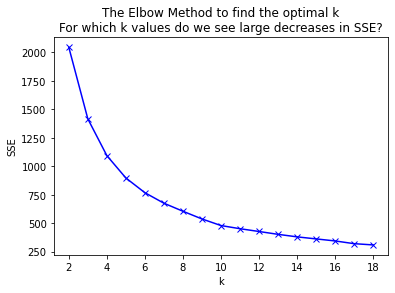

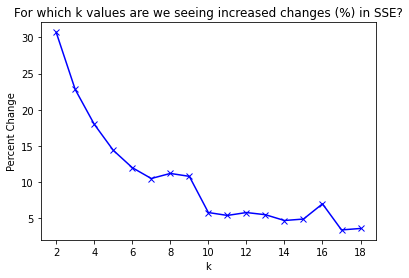

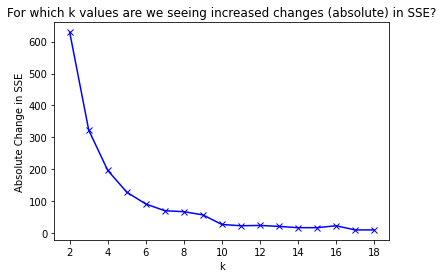

,k,sse,delta,pct_delta
0,2,2044.62449,629.00000,30.70000
1,3,1416.03399,323.00000,22.80000
2,4,1093.33730,197.00000,18.00000
3,5,896.72375,129.00000,14.40000
4,6,767.41044,92.00000,12.00000
...,...,...,...,...
12,14,379.70114,18.00000,4.70000
13,15,361.67163,18.00000,4.90000
14,16,343.82990,24.00000,7.00000
15,17,319.85720,11.00000,3.40000


In [12]:
# Our first cluster - Area
# Using the Elbow method we decided to cluster on k =6

cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
explore2.find_k(X_train, cluster_vars, k_range)

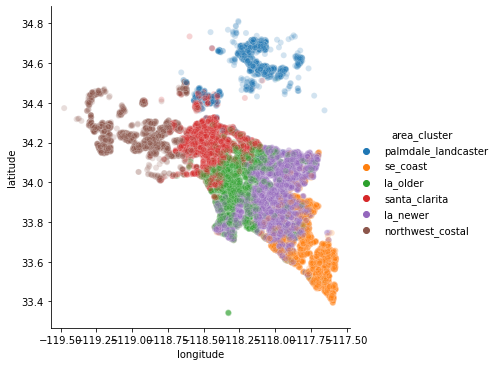

In [10]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='area_cluster', alpha =0.2);

# Cluster 2 : Size

features = 'scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio'

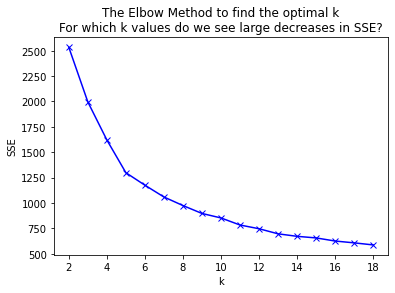

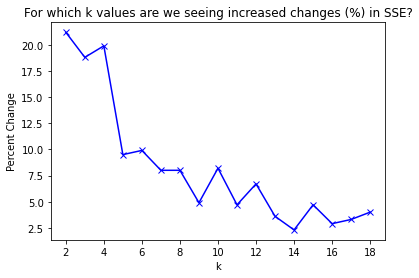

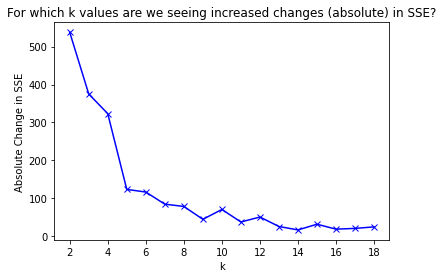

,k,sse,delta,pct_delta
0,2,2533.74932,538.00000,21.20000
1,3,1995.50530,375.00000,18.80000
2,4,1620.74994,323.00000,19.90000
3,5,1298.03629,123.00000,9.50000
4,6,1174.91467,116.00000,9.90000
...,...,...,...,...
12,14,671.12709,16.00000,2.30000
13,15,655.46722,31.00000,4.70000
14,16,624.89088,18.00000,2.90000
15,17,606.87037,20.00000,3.30000


In [14]:
# Using the Elbow method we decided to cluster on k =7

cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

explore2. find_k(X_train, cluster_vars, k_range)

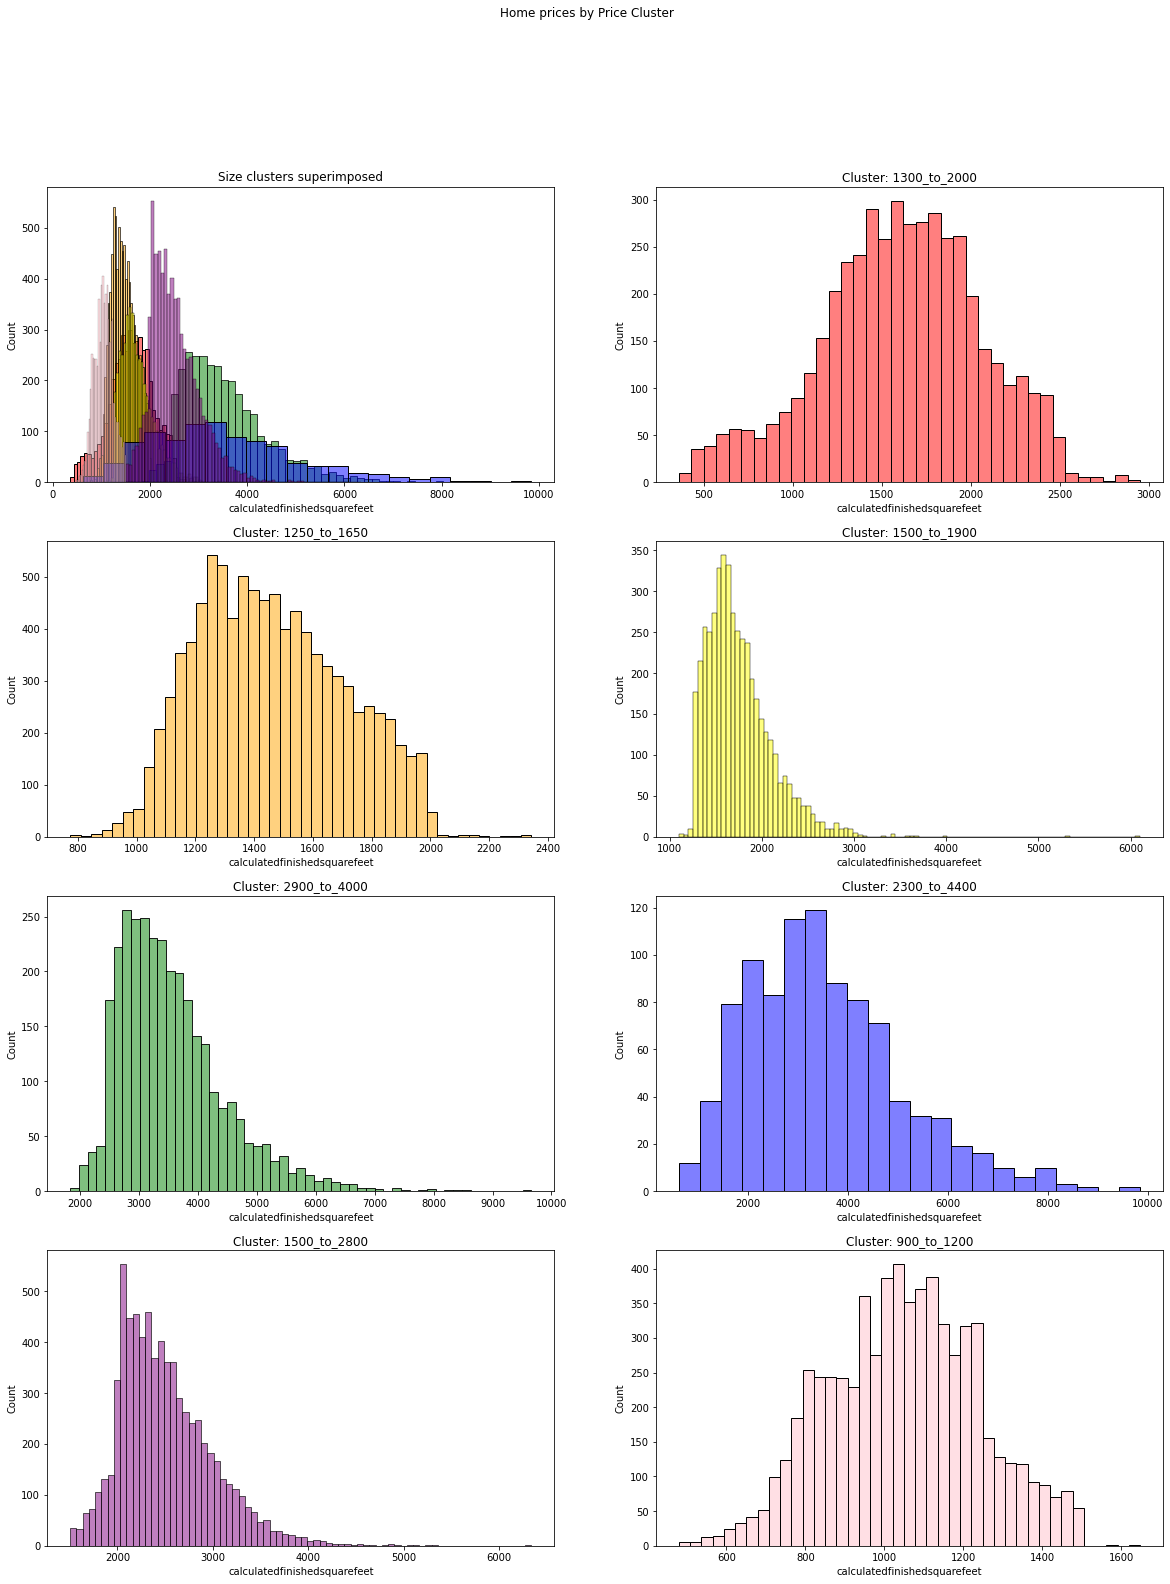

In [16]:
#Visual representation of size clustering by overlaying and looking at each cluster individually for meaning
explore2.plot_size_clusters()

In [18]:
X_train.dtypes

Unnamed: 0                                int64
parcelid                                  int64
bathroomcnt                             float64
bedroomcnt                              float64
calculatedfinishedsquarefeet            float64
fips                                    float64
latitude                                float64
longitude                               float64
lotsizesquarefeet                       float64
regionidcity                            float64
regionidcounty                          float64
regionidzip                             float64
yearbuilt                               float64
structuretaxvaluedollarcnt              float64
taxvaluedollarcnt                       float64
landtaxvaluedollarcnt                   float64
taxamount                               float64
county                                   object
age                                     float64
age_bin                                 float64
taxrate                                 

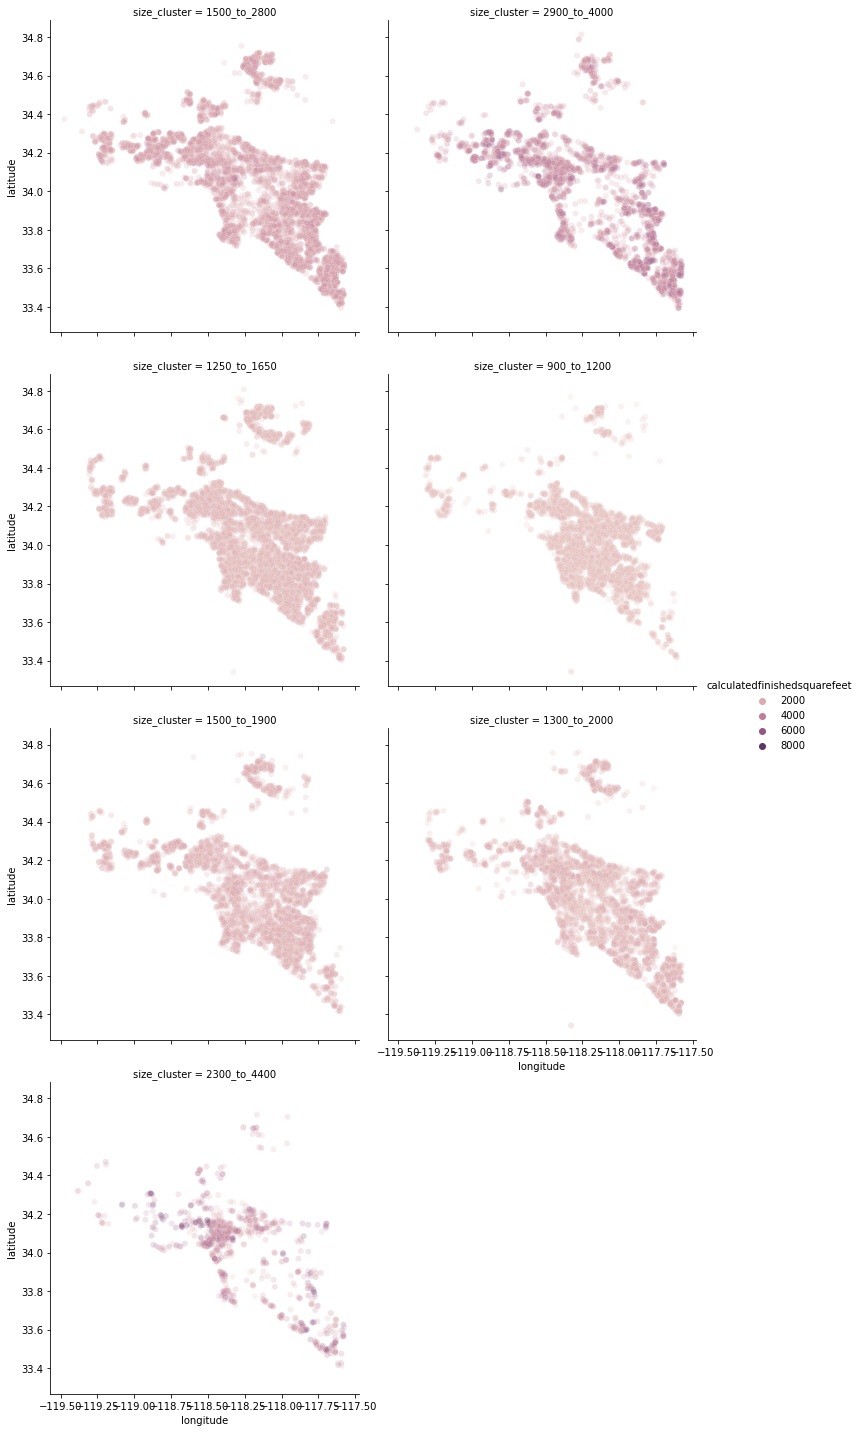

In [22]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long

sns.relplot(data=X_train, x='longitude', y='latitude', hue='calculatedfinishedsquarefeet', alpha =0.2, col='size_cluster', col_wrap=2);

# Cluster 3: Price
features = 'taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin'

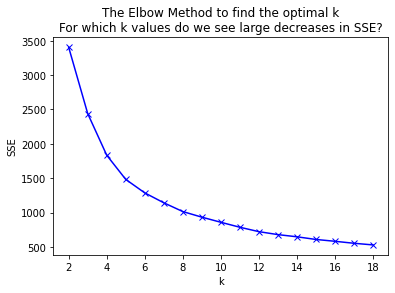

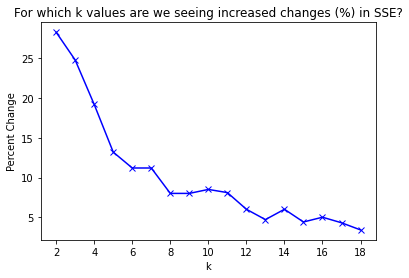

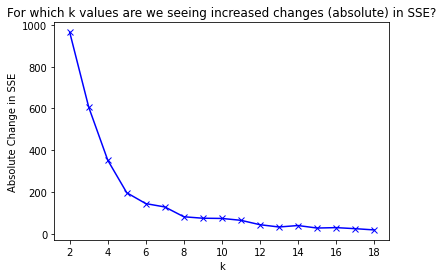

,k,sse,delta,pct_delta
0,2,3405.13764,965.00000,28.30000
1,3,2440.53217,606.00000,24.80000
2,4,1834.18561,352.00000,19.20000
3,5,1481.97112,196.00000,13.20000
4,6,1285.75629,144.00000,11.20000
...,...,...,...,...
12,14,646.75834,39.00000,6.00000
13,15,607.92489,27.00000,4.40000
14,16,581.28287,29.00000,5.00000
15,17,552.46332,24.00000,4.30000


In [23]:
# Using the Elbow method we decided to cluster on k = 5
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'

explore2.find_k(X_train, cluster_vars, k_range)

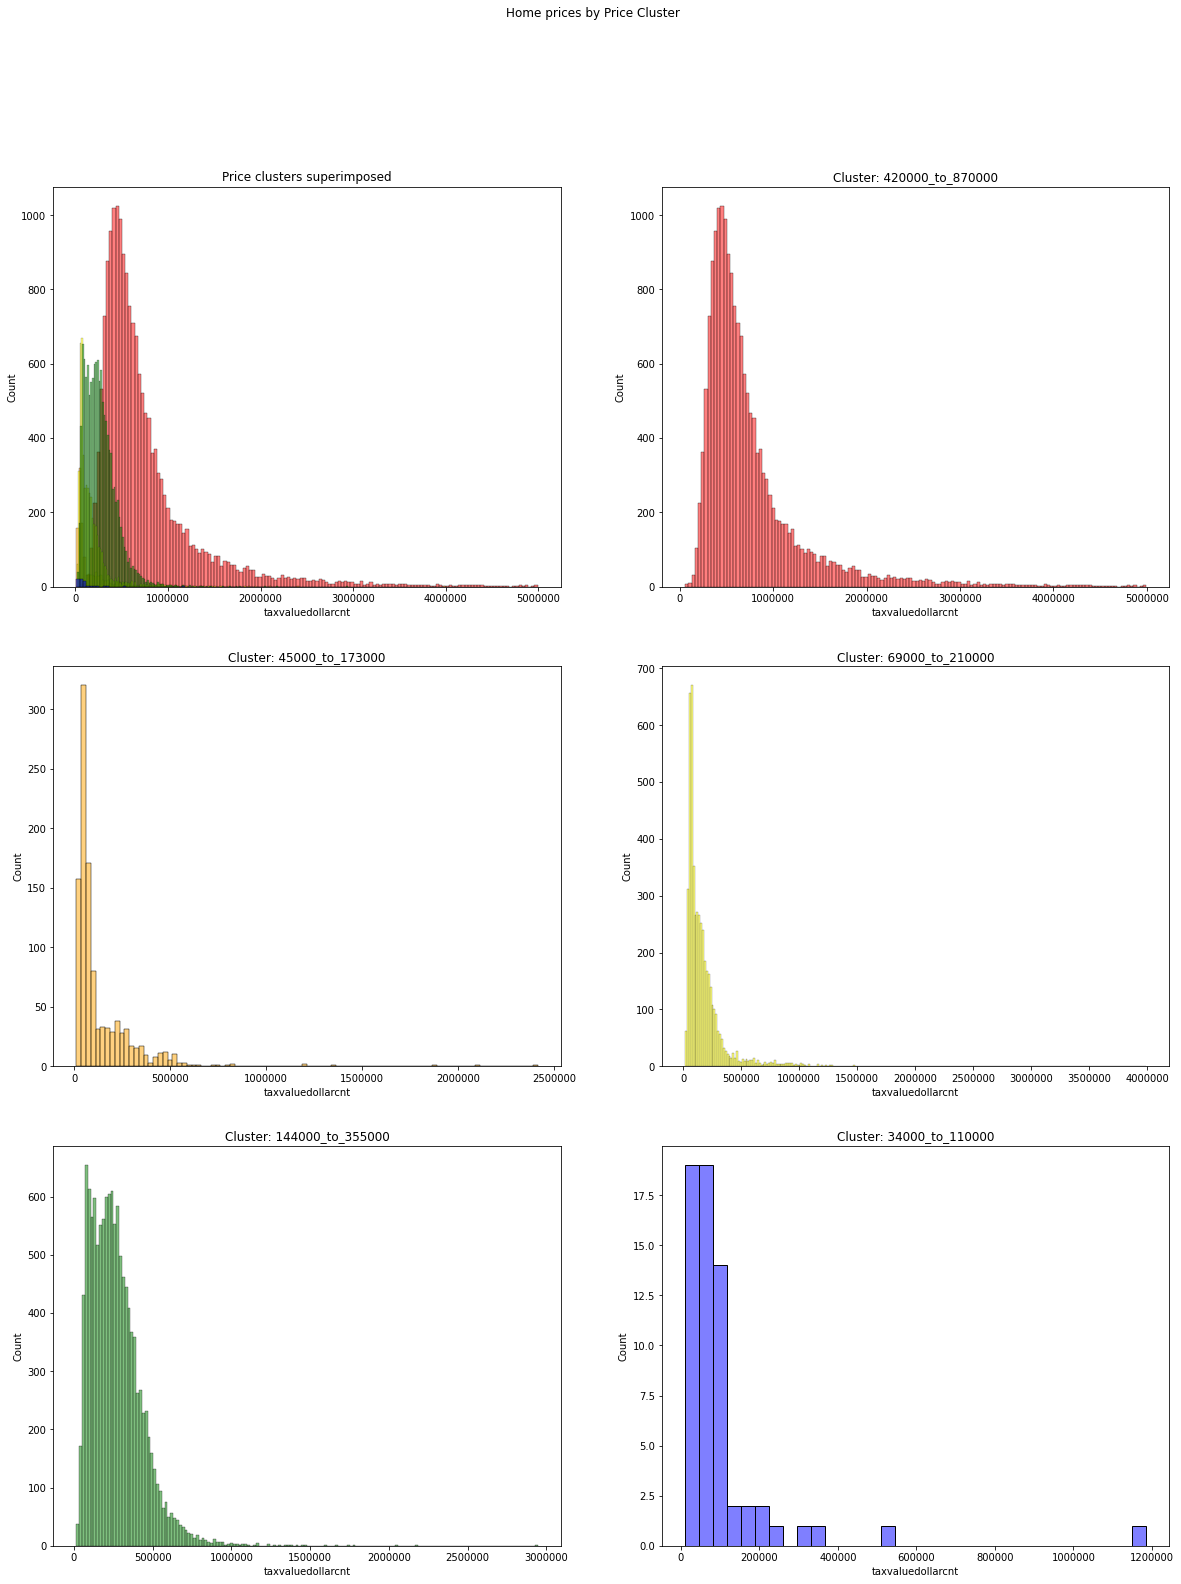

In [24]:
#Visual representation of price clustering by overlaying and looking at each cluster individually for meaning

explore2.plot_prices_clusters()

In [ ]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long

sns.relplot(data=X_train, x='longitude', y='latitude', hue='price_cluster', alpha =0.2);

# Cluster 4: Tax
features = 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'

In [ ]:
# Using the Elbow method we decided to cluster on k = 5

cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
cluster_name = 'tax_cluster'
k_range = range(2,20)

explore.find_k(X_train, cluster_vars, k_range)

In [ ]:
#Visual representation of price clustering by overlaying and looking at each cluster individually for meaning
explore.plot_tax_cluster()

In [ ]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long
sns.relplot(data=X_train, x='longitude', y='latitude', hue='tax_cluster', alpha =0.2);

In [ ]:
train.head()

# Clustering Takeaways:
    - Each of the four clustering presented strong relationships of features to further understand the data
    - No single feature was used in multiple clusters
    - Clusters were given labels through detailed analysis to understand their deeper meaning
    - Clusters were one hot encoded to use for future modeling

# Modeling

    - Using multiple feature combinations we tested 6 different OLS models

### Model 1: 

We tested OLS on 10 features : geo(area), size and price clusters


In [ ]:
model.model_1()

### Model 2: 

We tested OLS on 11 features : geo(area) cluster area, bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, acres, age


In [ ]:
model.model_2()

### Model 3: 

We tested OLS on 12 features : geo(area) cluster area, taxamount, taxvaluedollarcnt, structuretaxvaluedollarcnt, landtaxvaluedollarcnt, acres, age

In [ ]:
model.model_3()

### Model 4:

We tested OLS on 6 features : taxvaluedollarcnt, structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, acres, age

In [ ]:
model.model_4()

### Model 5: 

We tested OLS on 22 features : geo(area) clusters, size clusters, price clusters, taxvaluedollarcnt, structuretaxvaluedollarcnt, landtaxvaluedollarcnt, taxamount

In [ ]:
model.model_5()

### Model 6: 

We tested OLS on 22 features : geo(area)clusters, size clusters, price clusters, tax clusters

In [ ]:
model.model_6()

In [12]:
# Test model that we are not evaluating
model.model_7()

train_rmse: 0.17430120096285087
train_r2: 0.004847450542280862
validate_rmse: 0.1695587479046829
validate_model7_r2: 0.0069386147542630505


In [11]:
# Test model that we are not evaluating
model.model_8()

train_rmse: 0.17433016362031462
train_r2: 0.004516705178828406
validate_rmse: 0.16965435137048301
validate_model8_r2: 0.005818449894350097


# Model Takeaways:
- All models performed beat the baseline RMSE for both train and validate
    
- Of our 6 models, model #5 was the best performing beating RMSE baseline by:
     0.23388% train
     0.20561% validate
        
- The tax value cluster was used in model #6 but model #5 was not clustered, which performed better
    
- Baseline model is very strong and we could only offer slight marginal improvements

# Conclusion / Takeaways:
- Clustering in multiple sets offered great insights in understanding our data at a deeper level    

- Baseline was extremely hard to beat and took great deal of scaling and clustering the data to outperform
    
- We could spend countless hours to find new insights and ways to beat our current model